In [1]:
# Importing Packages
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Flatten, Dense
import matplotlib.pyplot as plt
%matplotlib inline

4422102/4422102 [==============================] - 0s 0us/step


<Figure size 432x288 with 0 Axes>

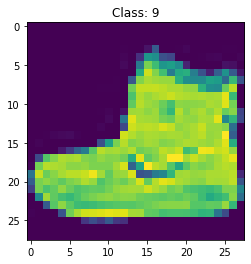

<Figure size 432x288 with 0 Axes>

In [2]:
# Loading Dataset
from keras.datasets import fashion_mnist
(x_train, x_lab),(y_test, y_lab) = fashion_mnist.load_data()
plt.imshow(x_train[0])
plt.title('Class: {}'.format(x_lab[0]))
plt.figure()

<Figure size 432x288 with 0 Axes>

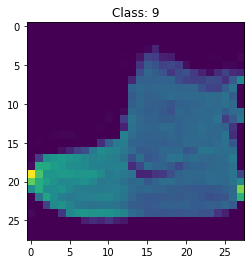

<Figure size 432x288 with 0 Axes>

In [3]:
# Normalizing the Data
x_train = keras.utils.normalize(x_train, axis = 1)
y_test = keras.utils.normalize(y_test, axis = 1)
plt.imshow(x_train[0])
plt.title('Class: {}'.format(x_lab[0]))
plt.figure()


In [4]:
# Defining the Model
model = Sequential()
model.add(Flatten(input_shape=((28,28))))
model.add(Dense(200, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [5]:
# Compiling the Model
model.compile(optimizer = "adam", loss="sparse_categorical_crossentropy", metrics = ["accuracy"])

In [9]:
model.fit(x_train,x_lab,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4919 - accuracy: 0.8209
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3628 - accuracy: 0.8668
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3216 - accuracy: 0.8812
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2972 - accuracy: 0.8903
Epoch 5/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2770 - accuracy: 0.8963
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2605 - accuracy: 0.9009
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2475 - accuracy: 0.9060
Epoch 8/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2346 - accuracy: 0.9118
Epoch 9/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2250 - accuracy: 0.9149
Epoch 10/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.214

In [10]:
# Evaluating on the Test Data
model.evaluate(y_test, y_lab)

313/313 [==============================] - 1s 2ms/step - loss: 0.3567 - accuracy: 0.8889


[0.35666027665138245, 0.8888999819755554]

In [11]:
# Predict the first 10 images, Probability Distribution
p = model.predict(y_test[:10])
print(p)

1/1 [==============================] - 0s 27ms/step
[[1.20662581e-13 1.62268376e-20 1.86820226e-10 7.24213116e-13
  5.97474923e-13 2.92795193e-08 8.74739896e-13 1.24340277e-05
  1.04277329e-12 9.99987423e-01]
 [2.84124888e-03 1.53654636e-13 9.95149434e-01 2.73356022e-08
  9.27570160e-04 6.42098257e-07 1.08103082e-03 4.90672791e-09
  4.34118297e-11 2.43926442e-11]
 [6.17726016e-07 9.99999344e-01 8.37619470e-12 3.61183472e-10
  7.75264644e-11 4.86471033e-16 2.60697103e-10 8.67737979e-16
  8.65447528e-15 4.20526888e-14]
 [7.09980208e-09 9.99999940e-01 1.90980782e-12 1.81593283e-08
  6.09321149e-10 5.75018851e-16 2.19156637e-11 5.17810873e-22
  9.21805967e-15 5.48678456e-16]
 [8.30155492e-01 3.00450897e-12 7.15508359e-05 5.42485395e-06
  8.95157282e-04 4.91862284e-06 1.68867320e-01 6.29054864e-11
  1.69986847e-09 5.07978165e-12]
 [2.05193282e-05 9.99979436e-01 2.74479439e-09 1.89021732e-09
  1.08210962e-09 3.64365317e-14 1.60290430e-08 3.35958403e-15
  4.81183358e-14 2.68430535e-14]
 [4.54

In [12]:
pred = np.argmax(p, axis=1)
print(pred)
print(y_lab[:10])

[9 2 1 1 0 1 4 6 5 7]
[9 2 1 1 6 1 4 6 5 7]


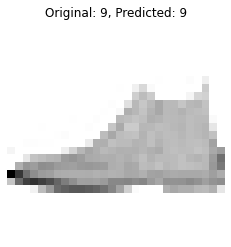

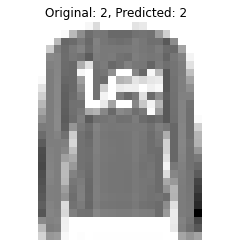

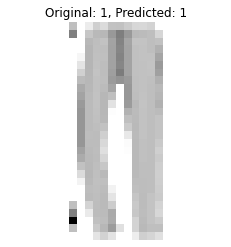

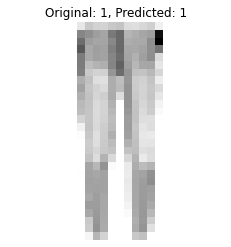

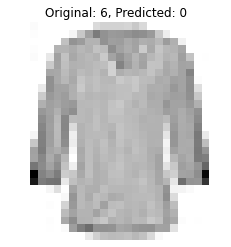

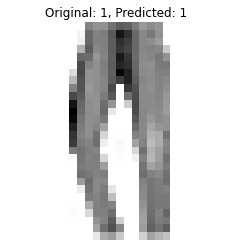

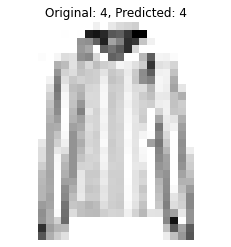

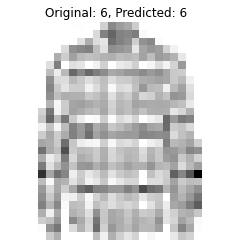

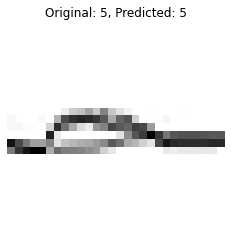

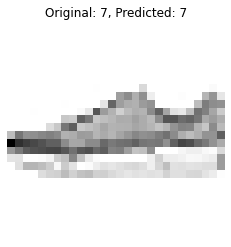

<Figure size 432x288 with 0 Axes>

In [13]:
# Visualizing the result
for i in range(10):
  plt.imshow(y_test[i], cmap="binary")
  plt.title('Original: {}, Predicted: {}'.format(y_lab[i], pred[i]))
  plt.axis("Off")
  plt.figure()